# 3.5 Classifying newswires: a multiclass classification example

## The Reuters dataset

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_data.shape

(8982,)

In [3]:
test_data.shape

(2246,)

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [5]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

## Preparing the data

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results

In [9]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [10]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
one_hot_test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building your network

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
# Compiling the model
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Validating your approach

In [16]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
# Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 302us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 171us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 161us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 184us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9108 - val_acc: 0.8030


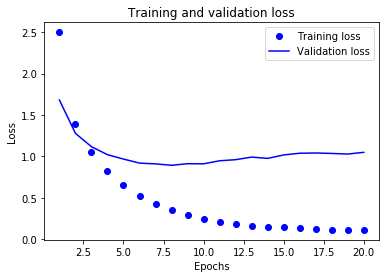

In [19]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

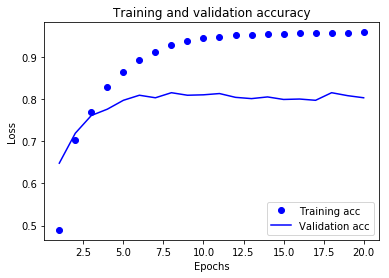

In [20]:
# Plotting the training and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The network begins to overfit after nine epochs. Let’s train a new network from
scratch for nine epochs and then evaluate it on the test set.

In [21]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 190us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 173us/step - loss: 1.3712 - acc: 0.7119 - val_loss: 1.2758 - val_acc: 0.7190
Epoch 3/9
7982/7982 [==============================] - 1s 183us/step - loss: 1.0139 - acc: 0.7784 - val_loss: 1.1298 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 167us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0542 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 171us/step - loss: 0.6393 - acc: 0.8632 - val_loss: 0.9760 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 170us/step - loss: 0.5117 - acc: 0.8924 - val_loss: 0.9093 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 165us/step - loss: 0.4112 - acc: 0.9141 - val_loss: 0.8911 - val_acc: 0.8200
Epoch 8

In [22]:
results

[1.0233029300149594, 0.7747105966692829]

## Generating predictions on new data

In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

1.0000001

In [28]:
np.max(predictions[0])

0.97348106

In [26]:
np.argmax(predictions[0])

3

In [27]:
predictions[0]

array([9.3783474e-06, 8.1612743e-05, 2.5402253e-05, 9.7348106e-01,
       1.5292631e-02, 1.0800744e-07, 9.2162401e-05, 2.7331345e-05,
       3.4049903e-03, 2.0487369e-06, 2.8847151e-05, 1.4764883e-03,
       5.5412602e-05, 2.4489686e-05, 4.5324050e-06, 1.8276674e-05,
       9.2056638e-04, 1.7866523e-04, 2.6266873e-04, 1.1616109e-03,
       7.6441030e-04, 4.5544296e-04, 7.2591165e-06, 5.6561155e-05,
       1.1855230e-05, 3.0588923e-04, 2.3892117e-06, 2.5039857e-05,
       7.6252704e-06, 9.8472119e-05, 3.2938374e-04, 1.8655564e-04,
       1.1682010e-05, 3.8389924e-05, 3.2692813e-05, 2.1140380e-05,
       1.6057979e-04, 4.5350578e-05, 8.8637964e-05, 2.7981718e-04,
       3.4796605e-05, 4.3945355e-04, 1.7585535e-06, 3.1280844e-05,
       6.0951861e-06, 9.1410702e-06], dtype=float32)

## A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as
an integer tensor.

In [ ]:
x_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach would change is the choice of the loss function. The loss
function used in listing 3.21, categorical_crossentropy, expects the labels to follow
a categorical encoding. With integer labels, you should use sparse_categorical_
crossentropy.

In [29]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])


This new loss function is still mathematically the same as categorical_crossentropy;
it just has a different interface.

## The importance of having sufficiently large intermediate layers

We mentioned earlier that because the final outputs are 46-dimensional, you should
avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what
happens when you introduce an information bottleneck by having intermediate layers
that are significantly less than 46-dimensional: for example, 4-dimensional.

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 342us/step - loss: 3.1701 - acc: 0.2428 - val_loss: 2.6188 - val_acc: 0.2770
Epoch 2/20
7982/7982 [==============================] - 2s 208us/step - loss: 2.0629 - acc: 0.5430 - val_loss: 1.7021 - val_acc: 0.5860
Epoch 3/20
7982/7982 [==============================] - 2s 205us/step - loss: 1.5016 - acc: 0.6214 - val_loss: 1.5115 - val_acc: 0.6380
Epoch 4/20
7982/7982 [==============================] - 2s 205us/step - loss: 1.2891 - acc: 0.6903 - val_loss: 1.4151 - val_acc: 0.6770
Epoch 5/20
7982/7982 [==============================] - 2s 205us/step - loss: 1.1460 - acc: 0.7150 - val_loss: 1.3651 - val_acc: 0.6810
Epoch 6/20
7982/7982 [==============================] - 2s 229us/step - loss: 1.0406 - acc: 0.7318 - val_loss: 1.3414 - val_acc: 0.6970
Epoch 7/20
7982/7982 [==============================] - 2s 230us/step - loss: 0.9586 - acc: 0.7424 - val_loss: 1.3411 - val_acc: 0.6980


The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it.